# Scaling

## Plots and fitting of known matrix size vs time usage

The results below is paramester of number of grid points ($n$ in $2n+1$) vs matrix size (matrix memory usage in unit of GiB) and total time to solve the dynamics in `sho` - harmonic model. The results are in 2D, so the number $N$ is not very comparable with those $N$ in 3D, but matrix size is reliable variable in scaling plot.

[1.10718155 7.41074837]


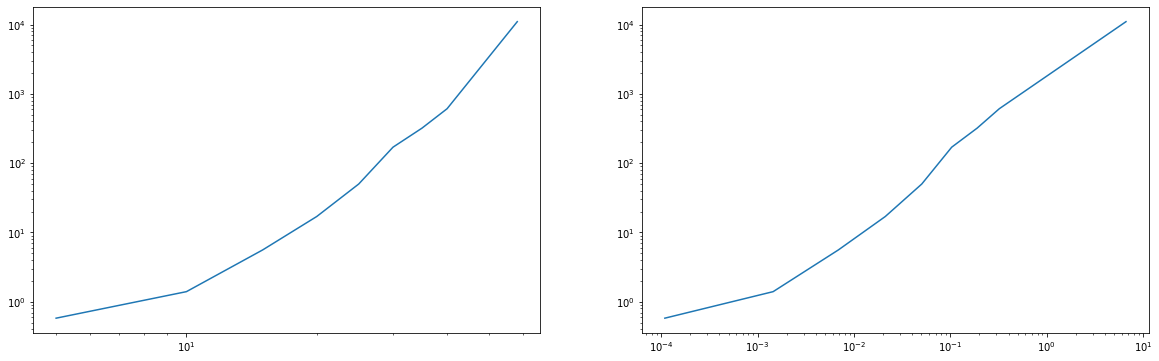

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array([[5, 0.000109084, 0.58], [10, 0.001449, 1.4],
              [1.50E+01, 6.88E-03, 5.60E+00], [2.00E+01, 2.11E-02, 1.70E+01],
              [2.50E+01, 5.04E-02, 5.00E+01], [3.00E+01, 1.03E-01, 1.70E+02],
              [3.50E+01, 1.89E-01, 3.20E+02], [4.00E+01, 3.21E-01, 6.10E+02],
              [15**(3 / 2), 6.61242,
               1.1e+04]])  # last one is from 3D calculation
f = plt.figure(figsize=[20, 6])
ax1 = f.add_subplot(1, 2, 1)
ax2 = f.add_subplot(1, 2, 2)
ax1.loglog(a[:, 0], a[:, 2])
ax2.loglog(a[:, 1], a[:, 2])

fit = np.polyfit(np.log(a[1:, 1]), np.log(a[1:, 2]), deg=1)
print(fit)

A rough linear scaling is derived from fitting, so a $~O(m^2)$ time scaling is estimated, with $m$ matrix size.

In [9]:
plfit = np.polyfit(a[1:, 1], a[1:, 2], deg=1)
print(plfit)


def mem_est(n):
    n = np.array(n)
    Ndim = np.product(2 * n + 1)
    mem = 2**(2 * np.log2(Ndim) + 3 - 30)
    print("mem_set: Matrix size= {}".format(Ndim))
    print(
        "mem_set: Estimated full matrix memory usage: {:.2f} GiB".format(mem))
    return mem


N = 15
n = np.array([N, N, N])
mem = mem_est(n)
t = plfit[None] @ np.array([mem, 1])[:, None]
print('{:.2f}s, or {:.2}h'.format(float(t), float(t / 3600)))
N = 10
n = N * np.array([1, 1, 2]) + np.array([0, 0, 1])
mem = mem_est(n)
t = plfit[None] @ np.array([mem, 1])[:, None]
print('{:.2f}s, or {:.2}h'.format(float(t), float(t / 3600)))


[1663.63284437    2.59347841]
mem_set: Matrix size= 29791
mem_set: Estimated full matrix memory usage: 6.61 GiB
11003.23s, or 3.1h
mem_set: Matrix size= 18963
mem_set: Estimated full matrix memory usage: 2.68 GiB
4459.79s, or 1.2h


## Actual time consumption:
1. sho
```
I ran on: 
bc12u19n3
3D harmonic potential starts.
DVR3d: model is harmonic potential.
n=[15 15 15], dx=[0.4 0.4 0.4], model=sho, t=50 starts.
Matrix size= 29791
Estimated matrix memory usage: 6.61242 GiB
Parameter setting time: 0.00029s.
H_mat: model is harmonic potential.
Initial state preparation finished. Time spent: 4.5e+02s.
H_mat: model is harmonic potential.
H_mat: model is harmonic potential.
n=[15 15 15], dx=[0.4 0.4 0.4], model=sho, t=50 stroboscopic states preparation finished.
Stroboscopic eigensolver time spent: 9e+02s.
freq=10V_0 starts.
freq=10V_0 time evolution operator diagonalization finished. Time spent: 6.8e+03s.
matrix power p in each time step: 1.
freq=10V_0 model=sho step=50 finished. Time spent: 5.2e+02s.
freq=10V_0 model=sho step=100 finished. Time spent: 2.7e+02s.
freq=10V_0 model=sho step=150 finished. Time spent: 2.7e+02s.
freq=10V_0 model=sho step=200 finished. Time spent: 2.8e+02s.
freq=10V_0 model=sho step=250 finished. Time spent: 2.7e+02s.
freq=10V_0 model=sho step=300 finished. Time spent: 2.9e+02s.
freq=10V_0 model=sho step=350 finished. Time spent: 2.7e+02s.
freq=10V_0 model=sho step=400 finished. Time spent: 2.7e+02s.
freq=10V_0 model=sho step=450 finished. Time spent: 2.8e+02s.
freq=10V_0 model=sho step=500 finished. Time spent: 2.7e+02s.
freq=10V_0 model=sho finished. Time spent on this freq: 3e+03s.
All done. Total time spent: 1.1e+04s.
```
2. tweezer:
```
I ran on: 
bc12u17n1
3D tweezer potential starts.
DVR3d: model is Gaussian/tweezer potential.
n=[10 10 21], dx=[1890.36 1890.36 7251.21], model=Gaussian, t=2090399.9999999998 starts.
Matrix size= 18963
Estimated matrix memory usage: 2.67919 GiB
Parameter setting time: 0.00047s.
H_mat: model is Gaussian/tweezer potential.
Initial state preparation finished. Time spent: 1.1e+02s.
H_mat: model is Gaussian/tweezer potential.
H_mat: model is Gaussian/tweezer potential.
n=[10 10 21], dx=[1890.36 1890.36 7251.21], model=Gaussian, t=2090399.9999999998 stroboscopic states preparation finished.
Stroboscopic eigensolver time spent: 2.2e+02s.
freq=0.02V_0 starts.
freq=0.02V_0 time evolution operator diagonalization finished. Time spent: 2.5e+03s.
matrix power p in each time step: 209.
freq=0.02V_0 model=Gaussian step=50 finished. Time spent: 2e+03s.
freq=0.02V_0 model=Gaussian step=100 finished. Time spent: 2.1e+03s.
freq=0.02V_0 model=Gaussian step=150 finished. Time spent: 2e+03s.
freq=0.02V_0 model=Gaussian step=200 finished. Time spent: 2.5e+03s.
freq=0.02V_0 model=Gaussian finished. Time spent on this freq: 8.6e+03s.
freq=0.2V_0 starts.
freq=0.2V_0 time evolution operator diagonalization finished. Time spent: 2.6e+03s.
matrix power p in each time step: 2090.
freq=0.2V_0 model=Gaussian step=50 finished. Time spent: 2.5e+03s.
freq=0.2V_0 model=Gaussian step=100 finished. Time spent: 2.5e+03s.
freq=0.2V_0 model=Gaussian step=150 finished. Time spent: 2.5e+03s.
freq=0.2V_0 model=Gaussian step=200 finished. Time spent: 2.5e+03s.
freq=0.2V_0 model=Gaussian finished. Time spent on this freq: 9.9e+03s.
freq=2V_0 starts.
freq=2V_0 time evolution operator diagonalization finished. Time spent: 2.4e+03s.
matrix power p in each time step: 20900.
freq=2V_0 model=Gaussian step=50 finished. Time spent: 2.5e+03s.
freq=2V_0 model=Gaussian step=100 finished. Time spent: 2.6e+03s.
freq=2V_0 model=Gaussian step=150 finished. Time spent: 2.4e+03s.
freq=2V_0 model=Gaussian step=200 finished. Time spent: 2.6e+03s.
freq=2V_0 model=Gaussian finished. Time spent on this freq: 1e+04s.
All done. Total time spent: 3.7e+04s.
```
So the estimation is accurate for sho models, but for tweezer potential, as we have to calculate power of matrix for many times (long time evolution, with each time a ~1000 matrix power, ~200 steps), this latter part actually takes a lot of time.

The average time of one frequency in 3D tweezer is ~3.6 hour.

## Memory usage of absorption potential

In [1]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import numpy as np

In [2]:
a = np.array([1, 2, 3])
b = np.array([])
print(type(a).__name__)
type(a).__name__ == 'ndarray'

ndarray


True

In [22]:
import tracemalloc
import numpy.linalg as la

N = 10000
# starting the monitoring
tracemalloc.start()

A = np.random.rand(N, N)
# a = (a + a.conj().T) / 2
print('A = {:.2} GiB'.format(A.nbytes / 2**30))
E, W = la.eig(A)
del A
print('E = {:.2} GiB'.format(E.nbytes / 2**30))
print('W = {:.2} GiB'.format(W.nbytes / 2**30))
del E, W

# displaying the memory
mem = tracemalloc.get_traced_memory()
print('Final memory usage: {:.2g} GiB'.format(mem[0] / 2**30))
print('Peak memory usage: {:.2g} GiB'.format(mem[1] / 2**30))

# stopping the library
tracemalloc.stop()

A = 0.75 GiB
E = 0.00015 GiB
W = 1.5 GiB
Final memory usage: 2.8e-06 GiB
Peak memory usage: 2.2 GiB


In [4]:
import tracemalloc

import numpy as np
import matplotlib.pyplot as plt
from DVR3d_exe import *
import os
from plot_dynamics import plot_dynamics

N_list = range(20, 21, 2)
R = 3 * np.array([w, w, 2.4 * w])
freq_list = np.array([.005, .01, .02, .04, .06, .08, .1, .12, .16, .2])
freq_list = freq_list[[2] + list(range(4, 8)) + [-1]]
an = 0
d = 2
length = 1
# st = 2E-0
st = [1E-2 for i in range(2, 6, 2)
      ] + [0.125] + [5E-5 * np.exp(i * .6) for i in range(8, 31, 2)]
# st = st[0:1]
# freq_list = freq_list[0:1]
sn = 1000.0

# starting the monitoring
tracemalloc.start()

for N in N_list:
    %prun DVR3d_exe(N, R, freq_list=freq_list,stop_time=st,step_no=sn,dim=d, model='Gaussian', auto_t_step=False, realtime=False, absorber=True)

# displaying the memory
mem = tracemalloc.get_traced_memory()
print('Final memory usage: {:.2g} GiB'.format(mem[0] / 2**30))
print('Peak memory usage: {:.2g} GiB'.format(mem[1] / 2**30)) 
 
# stopping the library
tracemalloc.stop()


2D N=20 R0=[3.  3.  7.2]w
freq=[0.02 0.06 0.08 0.1  0.12 0.2 ]V_0
t=[   0.01    0.01    0.12    0.01    0.02    0.07    0.22    0.74    2.45
    8.14   27.02   89.7   297.83  988.82 3283.  ]
Gaussian potential starts.
param_set: model is Gaussian/tweezer potential.
n=[20 20  0], dx=[0.15 0.15 7.2 ]w, model=Gaussian,
t=[   0.01    0.01    0.12    0.01    0.02    0.07    0.22    0.74    2.45
    8.14   27.02   89.7   297.83  988.82 3283.  ],
t_step=[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.03 0.09 0.3  0.99
 3.28]
starts.
Matrix size= 1681
Estimated full matrix memory usage, float: 0.02 GiB, complex: 0.04 GiB
Parameter setting time: 0.00091s.

H_mat: n=[20 20  0] dx=[0.15 0.15 7.2 ]w Gaussian starts.
H_mat: H matrix memory usage: 0.021 GiB.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.77s.
H_solver: eigenstates memory usage: 0.021 GiB.
Initial state preparation finished. Time spent: 0.79s.

H_mat: n=[20 20  0] dx=[0.15 0.15 7.2 ]w Gaussian starts.
H_mat: H matrix memor

         2697570 function calls (2697380 primitive calls) in 89.445 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        8   74.175    9.272   74.195    9.274 linalg.py:1187(eig)
       12    4.210    0.351    4.210    0.351 dynamics.py:25(int_evo_ops)
        8    3.005    0.376    3.005    0.376 linalg.py:476(inv)
        6    2.020    0.337    6.231    1.038 dynamics.py:87(one_period_evo)
        1    0.765    0.765    0.765    0.765 linalg.py:1336(eigh)
     9434    0.510    0.000    1.520    0.000 dataset.py:800(__setitem__)
    28302    0.459    0.000    0.464    0.000 dataset.py:409(shape)
     4717    0.446    0.000    0.449    0.000 files.py:516(close)
     4717    0.334    0.000    4.675    0.001 DVR3d_exe.py:107(write_to_file)
    47170    0.308    0.000    0.310    0.000 dataset.py:483(dtype)
     9434    0.303    0.000    0.344    0.000 dataset.py:583(__init__)
     9434    0.295    0.000    0.930    0.000 g